-----
<div class="alert alert-block alert-info">
<h1> Tidy Data and Other Common EDA Data Manipulations </h1>

<div class="alert alert-block alert-warning">  
    
<h3><b>Tidy Data</b></h3>
    
The concept of tidy data is meant to ensure that data professionals know what makes a dataset suitable for analysis. It doesn't work for every single type of dataset (for example, corpuses of images or documents), but for most tabular datasets it works very well. You may be surprised at how messy and ugly datasets look when you get them from people who don't understand the concept of tidy data. 

Tidy data simply means that
- all columns are variables. 
- all rows are observations or instances.  
- all cells are values. 
</div>

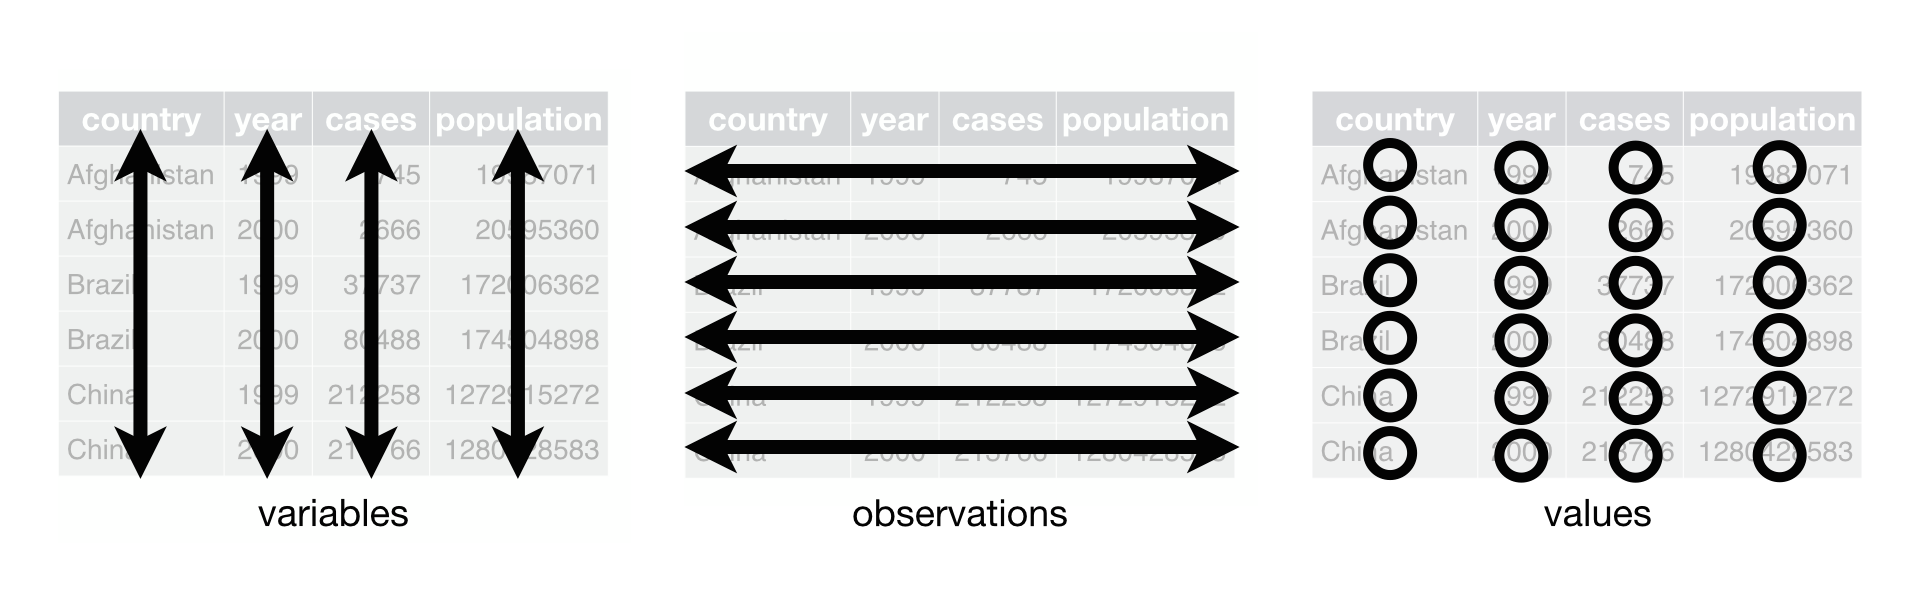

This might seem pretty straightforward, but don't be surprised when you get a dataset from somebody that looks like this instead:

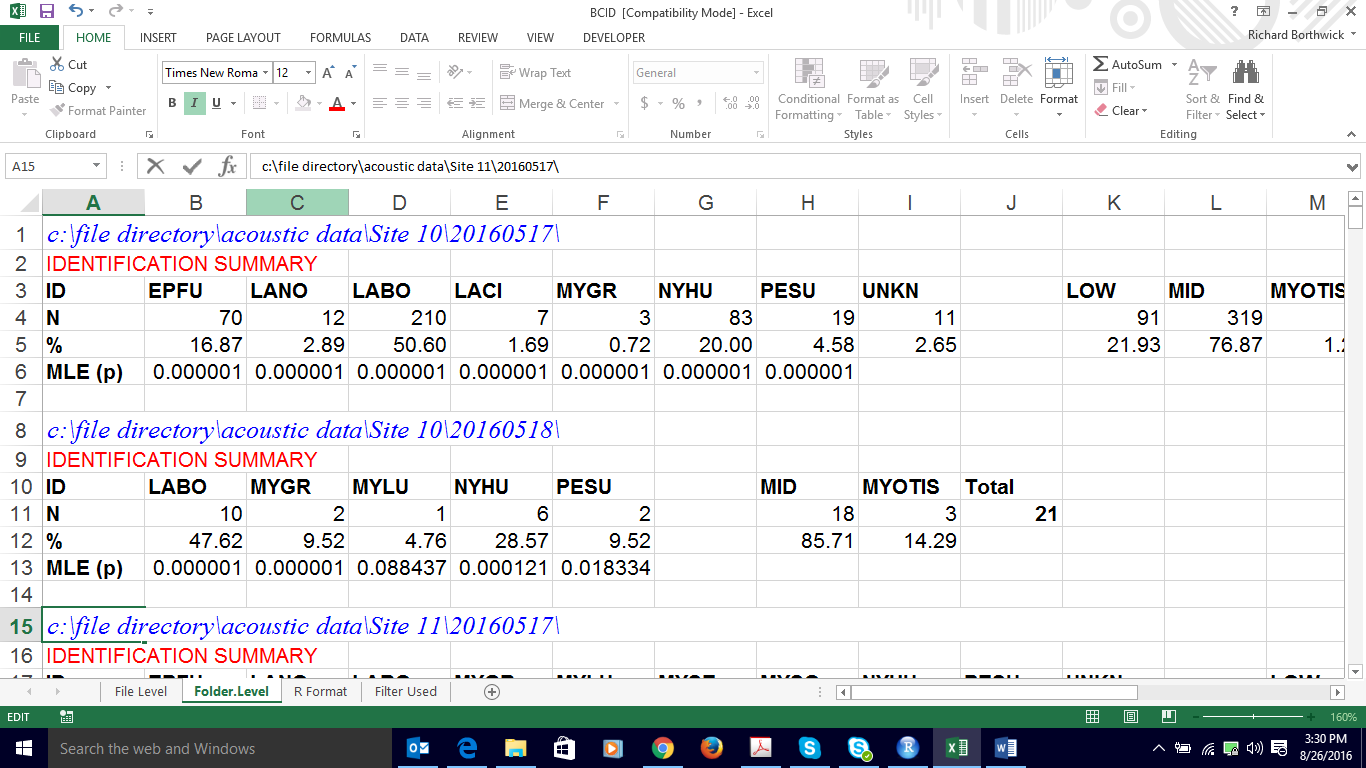

<div class="alert alert-block alert-success">  
    
<h3><b>There are certain things that you will be doing over and over again beyond the basic looking at the data.</b></h3>
    
It is very common to have to combine, stack, or merge several datasets together. This could be because this is how you received the data, or it could be something that happens as you are exploring the data and creating different views of the data.

<h4>Concatenating DataFrames</h4>

Stacking, or concatenating, DataFrames can be done fairly easily, you mainly have to be careful with the index.
    
</div>

![alt text](images/08_concat_row.svg)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_one = pd.DataFrame({'one':[1,2,3,4,5], 'two':[6,7,8,9,10]})
df_two = pd.DataFrame({'one':[6,7,8,9,10,11,12], 'two': [1,2,3,4,5,6,7]})

print(pd.concat([df_two, df_one], axis=0)) #notice the index
print(pd.concat([df_two, df_one], axis=1)) # notice the new columns
print(pd.concat([df_two, df_one], axis=0, ignore_index=True)) # notice the new index

   one  two
0    6    1
1    7    2
2    8    3
3    9    4
4   10    5
5   11    6
6   12    7
0    1    6
1    2    7
2    3    8
3    4    9
4    5   10
   one  two  one   two
0    6    1  1.0   6.0
1    7    2  2.0   7.0
2    8    3  3.0   8.0
3    9    4  4.0   9.0
4   10    5  5.0  10.0
5   11    6  NaN   NaN
6   12    7  NaN   NaN
    one  two
0     6    1
1     7    2
2     8    3
3     9    4
4    10    5
5    11    6
6    12    7
7     1    6
8     2    7
9     3    8
10    4    9
11    5   10


<div class="alert alert-block alert-success">  

<h4>Joining, or Merging, DataFrames</h4>

It is also very common to have multiple DataFrames where each DataFrame may have common columns, at least one of which is an identifier (ID), and some columns that are unique to each DataFrame. For example, you can have one DataFrame with customer IDs, customer address, customer phone number, etc., and a separate DataFrame with customer IDs, customer purchase date, customer purchase item, etc.. 

In these cases, you may not want to concatenate the DataFrames together because this would give you duplicate IDs with a bunch of missing values for the columns that don't exist in both DataFrames. Instead, you may be looking for something like a **join** or a **merge**, a way to combine the two DataFrames into one DataFrame that makes the most sense. You will learn a LOT more about joins in the relational databases course, but for now, let's see some simple examples to get a taste of how to start thinking about **joins/merges**.

</div>

![alt text](images/08_merge_left.svg)

In [27]:
# create two DataFrames with a common column 'id'
df_one = pd.DataFrame({'id':[1,2,3,4,5], 'two':[6,7,8,9,10]})
df_two = pd.DataFrame({'id':[1,2,3,4,5,6,7,8], 'three': [10,11,12,13,14,15,16,17]})

# see what happens when we use concatenation
print(pd.concat([df_two, df_one], axis=0)) #notice the index
print(pd.concat([df_two, df_one], axis=1)) # notice the new columns
print(pd.concat([df_two, df_one], axis=0, ignore_index=True)) # notice the new index

   id  three   two
0   1   10.0   NaN
1   2   11.0   NaN
2   3   12.0   NaN
3   4   13.0   NaN
4   5   14.0   NaN
5   6   15.0   NaN
6   7   16.0   NaN
7   8   17.0   NaN
0   1    NaN   6.0
1   2    NaN   7.0
2   3    NaN   8.0
3   4    NaN   9.0
4   5    NaN  10.0
   id  three   id   two
0   1     10  1.0   6.0
1   2     11  2.0   7.0
2   3     12  3.0   8.0
3   4     13  4.0   9.0
4   5     14  5.0  10.0
5   6     15  NaN   NaN
6   7     16  NaN   NaN
7   8     17  NaN   NaN
    id  three   two
0    1   10.0   NaN
1    2   11.0   NaN
2    3   12.0   NaN
3    4   13.0   NaN
4    5   14.0   NaN
5    6   15.0   NaN
6    7   16.0   NaN
7    8   17.0   NaN
8    1    NaN   6.0
9    2    NaN   7.0
10   3    NaN   8.0
11   4    NaN   9.0
12   5    NaN  10.0


In [26]:
# now let's do this right and use a merge
# this merge will only keep the rows that have matching 'id' values in both DataFrames
print(pd.merge(df_one, df_two, on='id', how='inner')) #inner join

   id  two  three
0   1    6     10
1   2    7     11
2   3    8     12
3   4    9     13
4   5   10     14


In [5]:
# now let's do an outer join, which will keep all rows from both DataFrames
print(pd.merge(df_one, df_two, on='id', how='outer')) #outer join

   id   two  three
0   1   6.0     10
1   2   7.0     11
2   3   8.0     12
3   4   9.0     13
4   5  10.0     14
5   6   NaN     15
6   7   NaN     16
7   8   NaN     17


In [6]:
df_one = pd.DataFrame({'id1':[1,1,2,3,3,4,4,4,5], 'id2':['a','b','a','a', 'b', 'a', 'b', 'c', 'a'], 'cost':range(9)})
df_two = pd.DataFrame({'id1':[1,1,2,4,4,4], 'id2':['a','b','a', 'a', 'b', 'c'], 'amount':range(9, 15)})
print(df_one)
print(df_two)

   id1 id2  cost
0    1   a     0
1    1   b     1
2    2   a     2
3    3   a     3
4    3   b     4
5    4   a     5
6    4   b     6
7    4   c     7
8    5   a     8
   id1 id2  amount
0    1   a       9
1    1   b      10
2    2   a      11
3    4   a      12
4    4   b      13
5    4   c      14


In [7]:
df_all = pd.merge(df_one, df_two, on=['id1', 'id2'], how='inner')
print(df_all)

   id1 id2  cost  amount
0    1   a     0       9
1    1   b     1      10
2    2   a     2      11
3    4   a     5      12
4    4   b     6      13
5    4   c     7      14


<div class="alert alert-block alert-success">  

<h3>Tidy Data and Reshaping DataFrames </h3>

Sometimes you may have a DataFrame that has multiple columns representing the same value, but for different time intervals or groups. For example, you might have a customer ID, and they you may have a column that represents customer spend for January, a column for February, a column for March, etc.. This is called a **wide** table, and can often make doing analysis more difficult because you have to refer to each individual column by name if you wanted to do something like calculate the total spend for a full year. We can fix this by converting the table from **wide** to **long**. 

</div>

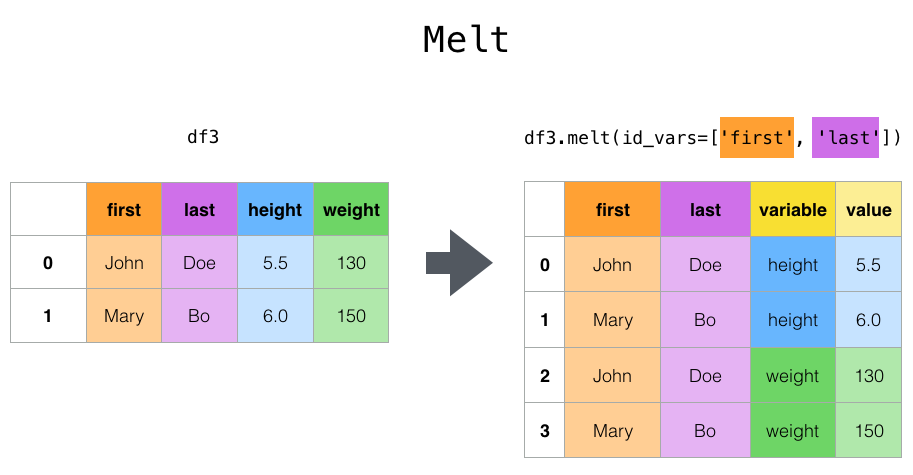

In [35]:
# wide DataFrame to start out with
df_wide = pd.DataFrame({
    "Student": ["Alice", "Bob", "Charlie"],
    "Math": [85, 90, 95],
    "English": [78, 85, 82],
    "History": [88, 76, 90]
})

print(df_wide)

   Student  Math  English  History
0    Alice    85       78       88
1      Bob    90       85       76
2  Charlie    95       82       90


In [36]:
# Convert to long format
df_long = pd.melt(df_wide, id_vars="Student", var_name="Subject", value_name="Score") 
# id_vars is the column that will remain as is 
# var_name is the name of the new column that will hold the names of the original columns
# value_name is the name of the new column that will hold the values from those original columns
print(df_long)

   Student  Subject  Score
0    Alice     Math     85
1      Bob     Math     90
2  Charlie     Math     95
3    Alice  English     78
4      Bob  English     85
5  Charlie  English     82
6    Alice  History     88
7      Bob  History     76
8  Charlie  History     90


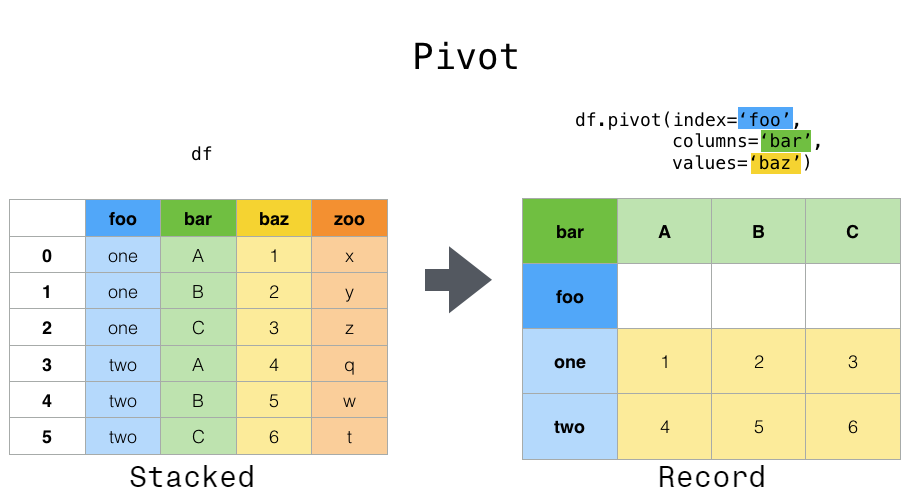

In [46]:
# convert wide DataFrame to wide again
df_wide_again = df_long.pivot(index="Student", columns="Subject", values="Score").reset_index()
# reset_index is used to turn the index back into a column
print(df_wide_again)

Subject  Student  English  History  Math
0          Alice       78       88    85
1            Bob       85       76    90
2        Charlie       82       90    95


<div class="alert alert-block alert-success">  
<h3>Other Data Manipulations: Aggregations; Renaming Columns; Recoding Categorical Variables</h3>

Let's do more modifications of the DataFrames. We often want to aggregate values by groups, rename old columns, or recode categorical columns using new categories. Let's see how to do each of these next.

</div>

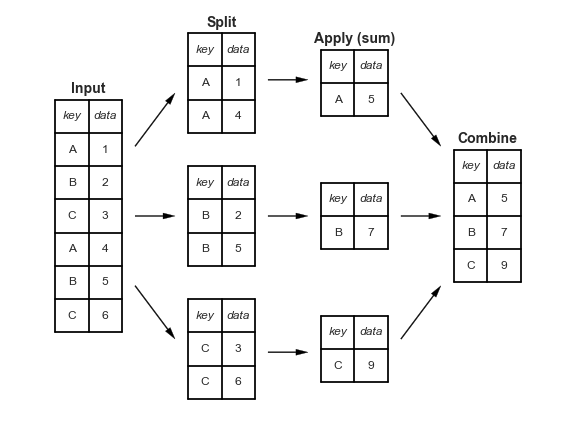

In [47]:
df_long.groupby("Student") #just to see what this looks like

In [12]:
df_long.groupby("Student")["Score"] # this is still an object, not a DataFrame

In [13]:
df_long.groupby("Student")["Score"].mean() #here we get our result

Student
Alice      83.666667
Bob        83.666667
Charlie    89.000000
Name: Score, dtype: float64

In [14]:
# Let's take our long DataFrame from above and calculate the average score for each student across all subjects.
average_scores = df_long.groupby("Student")["Score"].mean().reset_index()
print(average_scores)

   Student      Score
0    Alice  83.666667
1      Bob  83.666667
2  Charlie  89.000000


In [15]:
# Rename the 'Score' column to 'Average_Score' and note that we can do this in place
average_scores.rename(columns={"Score": "Average_Score"}, inplace=True)
print(average_scores)

   Student  Average_Score
0    Alice      83.666667
1      Bob      83.666667
2  Charlie      89.000000


Let's do something a little more complex. Instead of a single aggregation, let's do multiple aggregations at once. For this, let's use a more complicated set of data with many columns: the flights data. This data set has information about different flights including the date, departure and arrival times, flight number, distance of the flight, and more. 

In [28]:
url = "https://raw.githubusercontent.com/byuidatascience/data4python4ds/master/data-raw/flights/flights.csv"
flights = pd.read_csv(url)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


Ok, so let's say we want to know the average departure delay, the longest departure delay, and also the number of flights. We can do all of this in one go.

In [17]:
flights.groupby("month")["dep_delay"].mean() # simple aggregation we've done before

month
1     10.036665
2     10.816843
3     13.227076
4     13.938038
5     12.986859
6     20.846332
7     21.727787
8     12.611040
9      6.722476
10     6.243988
11     5.435362
12    16.576688
Name: dep_delay, dtype: float64

Now, let's do more complicated aggregations. We can use the `agg` method for this. Here's a table of common aggregations that can be done.

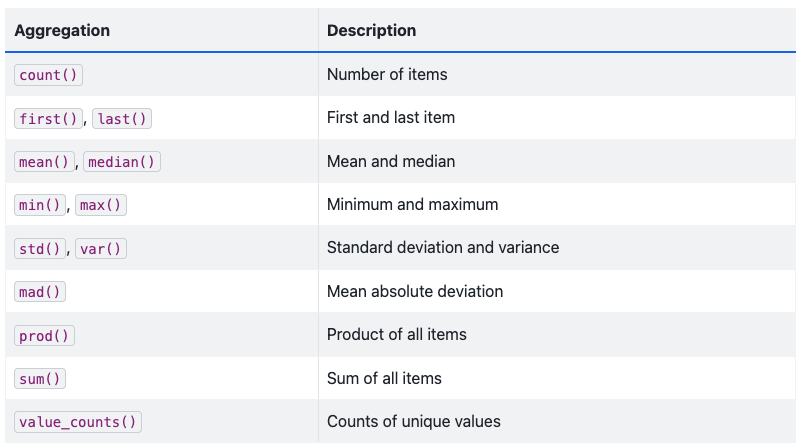

In [18]:
flights.groupby("month")[["dep_delay"]].agg("mean") # here's a simple aggregation we've done before, but now using the `agg` method
# Note how the brackets around "dep_delay" make this a DataFrame, not a Series

,dep_delay
month,
1,10.036665
2,10.816843
3,13.227076
4,13.938038
5,12.986859
6,20.846332
7,21.727787
8,12.611040
9,6.722476


In [19]:
# let's get the average departure delay, the longest departure delay, and number of flights for each month
flights.groupby(["month"]).agg(
        mean_delay=("dep_delay", "mean"),
        longest_delay=("dep_delay", "max"),
        count_flights=("dep_delay", "count")
    )

,mean_delay,longest_delay,count_flights
month,,,
1,10.036665,1301.0,26483
2,10.816843,853.0,23690
3,13.227076,911.0,27973
4,13.938038,960.0,27662
5,12.986859,878.0,28233
6,20.846332,1137.0,27234
7,21.727787,1005.0,28485
8,12.611040,520.0,28841
9,6.722476,1014.0,27122


Ok, now let's suppose we want the average delay, longest delay, and number of flights for each carrier, by month. We can group by multiple columns.

In [20]:
# group by multiple columns, note the index
flights.groupby(["month", "carrier"]).agg(
        mean_delay=("dep_delay", "mean"),
        longest_delay=("dep_delay", "max"),
        count_flights=("dep_delay", "count")
    )

mean_delay  longest_delay  count_flights
month carrier                                          
1     9E        16.882510          360.0           1498
      AA         6.932358          337.0           2735
      AS         7.354839          222.0             62
      B6         9.493436          502.0           4418
      DL         3.849768          599.0           3661
...                   ...            ...            ...
12    UA        17.722739          392.0           4833
      US         4.943653          336.0           1544
      VX         6.096154          119.0            468
      WN        24.894786          373.0           1074
      YV        13.113636          136.0             44

[185 rows x 3 columns]

In [21]:
# don't like the new index so let's reset it
flights.groupby(["month", "carrier"]).agg(
        mean_delay=("dep_delay", "mean"),
        longest_delay=("dep_delay", "max"),
        count_flights=("dep_delay", "count")
    ).reset_index()

,month,carrier,mean_delay,longest_delay,count_flights
0,1,9E,16.882510,360.0,1498
1,1,AA,6.932358,337.0,2735
2,1,AS,7.354839,222.0,62
3,1,B6,9.493436,502.0,4418
4,1,DL,3.849768,599.0,3661
...,...,...,...,...,...
180,12,UA,17.722739,392.0,4833
181,12,US,4.943653,336.0,1544
182,12,VX,6.096154,119.0,468
183,12,WN,24.894786,373.0,1074


## Let's go back to our long table of grades and recode some categories

Now, let's take our long table again and let's pretend we want to recode the Subject categories into the course code instead of the generic name of the subject.

In [22]:
# recode the Subject categories into the course code instead of the generic name of the subject.
subject_mapping = {
    "Math": "MATH101",
    "English": "ENG102",
    "History": "HIST103"
}
df_long['Subject'] = df_long['Subject'].map(subject_mapping)
print(df_long)

   Student  Subject  Score
0    Alice  MATH101     85
1      Bob  MATH101     90
2  Charlie  MATH101     95
3    Alice   ENG102     78
4      Bob   ENG102     85
5  Charlie   ENG102     82
6    Alice  HIST103     88
7      Bob  HIST103     76
8  Charlie  HIST103     90


The above works fine if you have simple mappings to do. But, if you want to use inequalities to do your recoding or anything more complex, you can use `apply`. 

In [23]:
# Let's recode the score column into letter grades using apply
def recode_score(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'  
    
df_long['Grade'] = df_long['Score'].apply(recode_score)
print(df_long)

   Student  Subject  Score Grade
0    Alice  MATH101     85     B
1      Bob  MATH101     90     A
2  Charlie  MATH101     95     A
3    Alice   ENG102     78     C
4      Bob   ENG102     85     B
5  Charlie   ENG102     82     B
6    Alice  HIST103     88     B
7      Bob  HIST103     76     C
8  Charlie  HIST103     90     A


In [24]:
print(df_long[(df_long['Score'] > 80) & (df_long['Score'] < 90)])  # Filter rows where Score is greater than 80 and less than 90

# df_long[df_long['Score'].between(80, 90)]  # Alternative way to filter rows using the between method

   Student  Subject  Score Grade
0    Alice  MATH101     85     B
4      Bob   ENG102     85     B
5  Charlie   ENG102     82     B
6    Alice  HIST103     88     B


<div class="alert alert-block alert-danger">
<b>Practice - Complete This and Turn it in</b>

Using the flights data from above answer the following questions and submit to Canvas before leaving today.

- Which carrier has the worst delays? Challenge: can you disentangle the effects of bad airports vs. bad carriers? Why/why not? (Hint: think about flights.groupby(["carrier", "dest"]).count())</li>
- Find the most delayed flight to each destination.</li>
- How do delays vary over the course of the day?</li>
 

Look at the messy data at <href> https://docs.google.com/spreadsheets/d/18zxJ5cx5b3ATPItfYqWeJZnLhWJqMe6-OlXsuHvrojY/edit?usp=sharing</href> and answer the following questions:
- Is the data tidy?  
- If not, what changes would need to be made in order to make the data tidy?  You do not need to implement these changes just write a bulleted list of changes you would make.






In [81]:
url = "https://raw.githubusercontent.com/byuidatascience/data4python4ds/master/data-raw/flights/flights.csv"
flights = pd.read_csv(url)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [116]:
# WHICH CARRIER HAS THE WORST DELAYS : F9 CARRIER

mean1 = flights.groupby(['carrier']).agg(mean_delay=("dep_delay", "mean"))
mean1.sort_values('mean_delay', ascending=False)

,mean_delay
carrier,
F9,20.215543
EV,19.955390
YV,18.996330
FL,18.726075
WN,17.711744
9E,16.725769
B6,13.022522
VX,12.869421
OO,12.586207


In [122]:
# FIND THE MOST DELAYED FLIGHT TO EACH DESTINATION : HNL 51

f = flights.groupby(['dest']).agg(longest_dep_delay=('dep_delay', 'max'), flight=('flight', 'first'))
f.sort_values('longest_dep_delay', ascending=False)


,longest_dep_delay,flight
dest,,
HNL,1301.0,51
CMH,1137.0,4490
ORD,1126.0,1696
SFO,1014.0,1124
CVG,1005.0,4687
...,...,...
HDN,46.0,441
EYW,40.0,1873
PSP,10.0,55


In [ ]:
# AS HOUR IS CLOSER TO 0, THE DELAYS ARE CLOSE TO NONE, AS THE INCREASE IN HOURS, THERE ARE AN INCREASE IN DEP DELAYS

flights.groupby(['hour']).agg(dep_delay=('dep_delay', 'mean'))

,dep_delay
hour,
1,NaN
5,0.687757
6,1.642796
7,1.914078
8,4.127948
9,4.583738
10,6.498295
11,7.191650
12,8.614849


In [ ]:
# IS THE DATA TIDY : NO

In [ ]:
# MELT THE COLUMNS OF THE MONTHS
# MAPPING FOR THE PRODUCT ITEMS
# FIX GRAMMAR AND MONTH ORGANIZATION 
# hi